In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('linear_data.csv')
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [3]:
df[['x']].head()

,x
0,0.00000
1,0.02004
2,0.04008
3,0.06012
4,0.08016


In [4]:
df['y']

0       4.447692
1       5.024612
2       5.869593
3       4.722490
4       4.877101
         ...    
495    25.356174
496    24.417804
497    25.625916
498    24.269704
499    24.732043
Name: y, Length: 500, dtype: float64

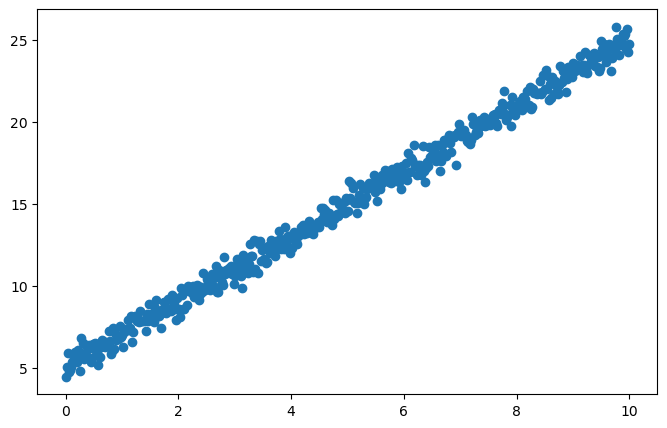

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(df[['x']], df['y'])

In [6]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [7]:
df2 = pd.read_csv('nonlinear_data (1).csv')
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


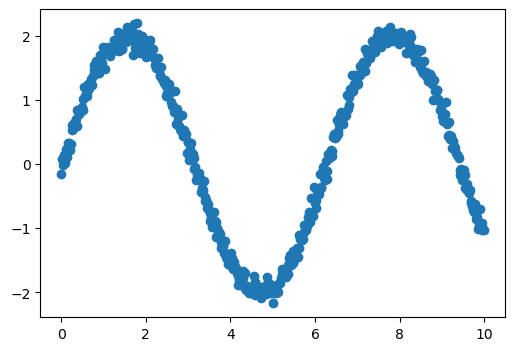

In [8]:
plt.figure(figsize=(6,4))
plt.scatter(df2[['x']], df2['y'])

In [9]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


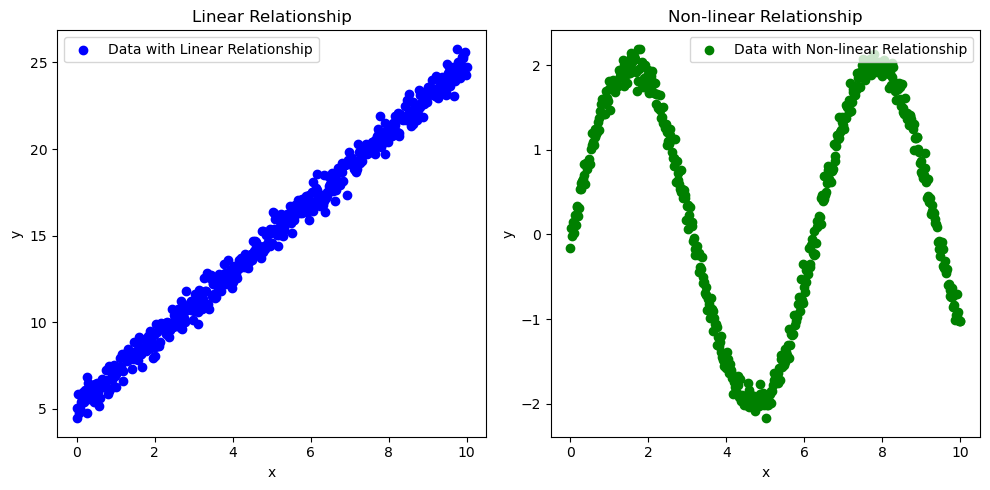

In [10]:
#Linear
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.scatter(df.x, df.y, color='blue', label= 'Data with Linear Relationship')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Relationship')
plt.legend()

#Non-linear
plt.subplot(1,2,2)
plt.scatter(df2.x, df2.y, color='green', label='Data with Non-linear Relationship')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
correlation_linear = np.corrcoef(df.x, df.y)
print("correlation coefficent for linear relatinship:", correlation_linear)

correlation coefficent for linear relatinship: [[1.         0.99643985]
 [0.99643985 1.        ]]


In [12]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [13]:
correlation_nonlinear = np.corrcoef(df2.x, df2.y) [0,1]
print("correlation coefficent for non linear relationship:", correlation_nonlinear)

correlation coefficent for non linear relationship: -0.06573583283905123


In [14]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


#Linear

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [17]:
reg1 = LinearRegression()

In [18]:
reg1.fit(df[['x']], df[['y']])

LinearRegression()

In [19]:
reg1.score(df[['x']], df[['y']])

0.9928923730526016

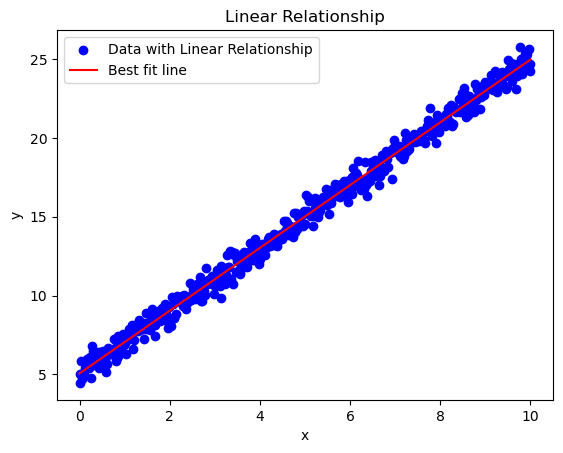

In [20]:
plt.scatter(df[['x']], df.y, color='blue', label='Data with Linear Relationship')
plt.plot(df[['x']], reg1.predict(df[['x']]), color='red', label='Best fit line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Relationship')
plt.legend()                  

In [21]:
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [22]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


In [25]:
reg2 = LinearRegression()

In [26]:
reg2.fit(df[['x']], df2.y)

LinearRegression()

In [27]:
reg2.score(df[['x']], df2.y)

0.004321199719043767

In [29]:
reg2.score(df2[['x']], df2.y)*100

0.4321199719043767

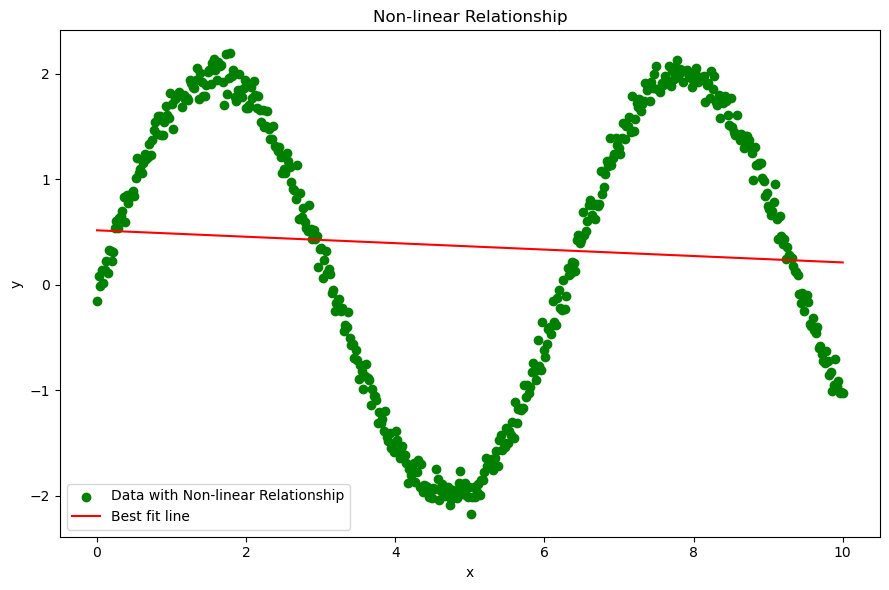

In [62]:
plt.figure(figsize=(9,6))

plt.scatter(df2.x, df2.y, color='green', label='Data with Non-linear Relationship')
plt.plot(df2[['x']], reg2.predict(df2[['x']]), color='red', label='Best fit line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-linear Relationship')
plt.legend() 

plt.tight_layout()
plt.show()

#Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
poly = PolynomialFeatures(degree=7)
x_poly = poly.fit_transform(df2[['x']])


In [56]:
x_poly.shape


(500, 8)

In [57]:
pd.DataFrame(x_poly)

,0,1,2,3,4,5,6,7
0,1.0,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07,3.232193e-09,6.477340e-11,1.298064e-12
2,1.0,0.04008,0.001606,0.000064,2.580583e-06,1.034302e-07,4.145498e-09,1.661522e-10
3,1.0,0.06012,0.003614,0.000217,1.306420e-05,7.854229e-07,4.721981e-08,2.838866e-09
4,1.0,0.08016,0.006426,0.000515,4.128932e-05,3.309766e-06,2.653119e-07,2.126748e-08
...,...,...,...,...,...,...,...,...
495,1.0,9.91984,98.403219,976.144159,9.683194e+03,9.605573e+04,9.528574e+05,9.452193e+06
496,1.0,9.93988,98.801210,982.072144,9.761679e+03,9.702992e+04,9.644657e+05,9.586673e+06
497,1.0,9.95992,99.200003,988.024080,9.840641e+03,9.801199e+04,9.761916e+05,9.722790e+06
498,1.0,9.97996,99.599600,994.000016,9.920080e+03,9.900200e+04,9.880360e+05,9.860560e+06


In [58]:
df2.x.head()

0    0.00000
1    0.02004
2    0.04008
3    0.06012
4    0.08016
Name: x, dtype: float64

In [59]:
reg_poly = LinearRegression()

In [60]:
reg_poly.fit(x_poly, df2.y)

LinearRegression()

In [61]:
reg_poly.score(x_poly, df2.y)

0.9936598606222097

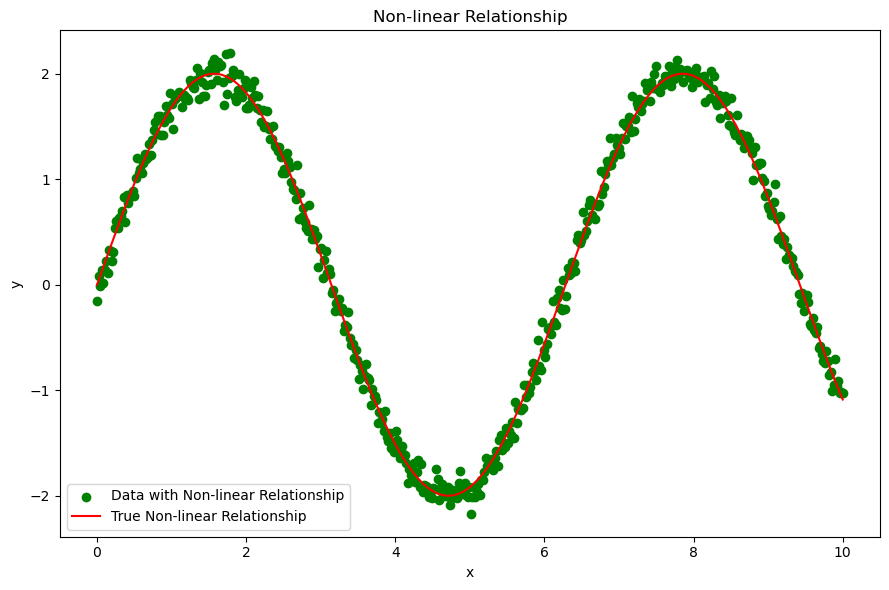

In [63]:
plt.figure(figsize=(9,6))

plt.scatter(df2.x, df2.y, color='green', label='Data with Non-linear Relationship')
plt.plot(df2.x, 2 * np.sin(df2.x), color='red', label='True Non-linear Relationship')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-linear Relationship')

plt.legend() 
plt.tight_layout()
plt.show()

#Testing Overfit or Bestfit

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
xtrain, xtest, ytrain, ytest= train_test_split(x_poly, df2.y, test_size=0.25, random_state=42)

In [66]:
xtrain.shape

(375, 8)

In [67]:
pd.DataFrame(xtrain)

,0,1,2,3,4,5,6,7
0,1.0,4.549098,20.694294,94.140377,428.253821,1948.168683,8862.410644,4.031598e+04
1,1.0,8.356713,69.834659,583.588235,4876.879639,40754.685563,340575.228054,2.846090e+06
2,1.0,4.068136,16.549733,67.326568,273.893654,1114.236707,4532.866762,1.844032e+04
3,1.0,2.525050,6.375878,16.099411,40.651820,102.647883,259.191048,6.544704e+02
4,1.0,6.593186,43.470107,286.606514,1889.650163,12458.815705,82143.293924,5.415860e+05
...,...,...,...,...,...,...,...,...
370,1.0,2.124248,4.512432,9.585526,20.362040,43.254032,91.882313,1.951809e+02
371,1.0,5.410822,29.276991,158.412576,857.142194,4637.843532,25094.544162,1.357821e+05
372,1.0,6.973948,48.635949,339.184576,2365.455560,16496.563824,115046.176565,8.023260e+05
373,1.0,8.717435,75.993671,662.469875,5775.037988,50343.517528,438866.335164,3.825789e+06


In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [69]:
reg_poly.fit(xtrain, ytrain)

LinearRegression()

In [70]:
reg_poly.score(xtrain, ytrain)

0.9939630254401275

In [71]:
reg_poly.score(xtest, ytest)

0.9923172867596295